In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


In [14]:
class SemiGradientTD:
    def __init__(self, env, alpha=0.01, gamma=0.99, degree=2):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.degree = degree
        self.poly = PolynomialFeatures(degree)  # Create a polynomial feature transformer
        self.feature_dim = self.poly.fit_transform(np.zeros((1, env.observation_space.shape[0]))).shape[1]
        self.w = np.zeros(self.feature_dim)  # Initialize weights
        self.weights_history = []  # To track the evolution of weights

    def get_features(self, state):
        # Transform the state into polynomial features
        state = state.reshape(1, -1)  # Reshape state to 2D array for transformation
        return self.poly.fit_transform(state).flatten()

    def v_hat(self, state):
        features = self.get_features(state)
        return np.dot(features, self.w)

    def grad_v_hat(self, state):
        # Gradient of v_hat w.r.t. weights w is the features
        return self.get_features(state)

    def update(self, state, reward, next_state, done):
        td_target = reward + (0 if done else self.gamma * self.v_hat(next_state))
        td_error = td_target - self.v_hat(state)
        
        # Semi-gradient TD(0) update
        self.w += self.alpha * td_error * self.grad_v_hat(state)

    def run(self, num_episodes=100000, track_interval=100):
        for episode in range(num_episodes):
            state, _ = self.env.reset()
            done = False
            total_reward = 0

            while not done:
                action = self.env.action_space.sample()  # Random policy
                next_state, reward, done, _, _ = self.env.step(action)
                self.update(state, reward, next_state, done)
                state = next_state
                total_reward += reward

            if episode % track_interval == 0:
                self.weights_history.append(self.w.copy())
                print(f"Episode {episode}, Total Reward: {total_reward}")

    def plot_weights_evolution(self):
        weights_history = np.array(self.weights_history)
        
        for i in range(weights_history.shape[1]):
            plt.figure(figsize=(15, 8))
            plt.plot(weights_history[:, i], label=f'Weight {i}')
        plt.xlabel('Tracking Intervals')
        plt.ylabel('Weight Value')
        plt.title('Evolution of Weights Over Time')
        plt.legend()
        plt.show()

In [3]:
env = gym.make("CartPole-v1")#, render_mode="human"
agent = SemiGradientTD(env)
agent.run(env)

Episode 0, Total Reward: 24.0
Episode 100, Total Reward: 41.0
Episode 200, Total Reward: 9.0
Episode 300, Total Reward: 11.0
Episode 400, Total Reward: 10.0
Episode 500, Total Reward: 19.0
Episode 600, Total Reward: 11.0
Episode 700, Total Reward: 23.0
Episode 800, Total Reward: 39.0
Episode 900, Total Reward: 13.0
Episode 1000, Total Reward: 36.0
Episode 1100, Total Reward: 21.0
Episode 1200, Total Reward: 31.0
Episode 1300, Total Reward: 18.0
Episode 1400, Total Reward: 18.0
Episode 1500, Total Reward: 10.0
Episode 1600, Total Reward: 23.0
Episode 1700, Total Reward: 29.0
Episode 1800, Total Reward: 19.0
Episode 1900, Total Reward: 26.0
Episode 2000, Total Reward: 27.0
Episode 2100, Total Reward: 24.0
Episode 2200, Total Reward: 20.0
Episode 2300, Total Reward: 31.0
Episode 2400, Total Reward: 15.0
Episode 2500, Total Reward: 50.0
Episode 2600, Total Reward: 31.0
Episode 2700, Total Reward: 13.0
Episode 2800, Total Reward: 17.0
Episode 2900, Total Reward: 19.0
Episode 3000, Total Rew

In [4]:
agent.w

array([ 20.36014825,  -1.39178877,   0.98412617,  -1.23047448,
        -0.64806965, -20.19668515,  41.02303462,  33.61209075,
        28.23197592, -18.99432067, -28.64661821, -28.08710861,
       -55.84226687, -66.34055586,  -8.80536335])

In [51]:
agent.w

array([1.05182684, 1.7541544 , 1.08067463, 0.86405873])

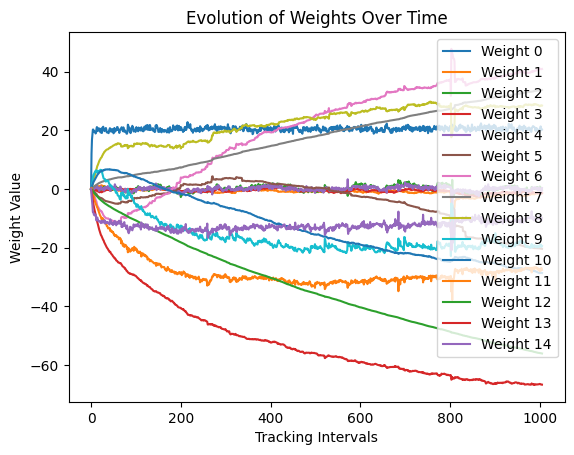

In [15]:

agent.plot_weights_evolution()

In [20]:
agent.w[0]=20

In [21]:
env = gym.make("CartPole-v1", render_mode="human")#, render_mode="human"
agent.run()

Episode 0, Total Reward: 13.0
Episode 100, Total Reward: 14.0
Episode 200, Total Reward: 13.0
Episode 300, Total Reward: 49.0


KeyboardInterrupt: 

In [20]:
for i in agent.w:
    print(i)

0.3791253576657036
0.5901419913891109
0.4913183170079025
0.6398978629356881
0.5457906022099918
0.6112900075349897
0.592778263737056
0.8189755843525137
0.6210868526988501
0.492527814322299
0.7690445190828243
0.6377922123653376
0.6271877777228233
0.5424974840948583
0.48042739127975304
0.5942545229314351
0.3684403001000311
0.4112743270347418
0.4228406345773783
0.7671981624943209
0.35984298505463613
0.3792888395958808
0.4680009732366661
0.5240288337044475
0.6810334808176844
0.7267445863144171
0.5578993062988783
0.5861183434204207
0.6174168130074609
0.7518506089631167
0.555397343077285
0.5497221611789813
0.7731433207823472
0.602567861074444
0.668865503524586
0.6496054204994568
0.7293462202631558
0.5541928015222745
0.5130841334771734
0.5762383532797575
0.6988404056431986
0.8087239066392659
0.791418641069416
0.803939558735122
0.8375676859102003
0.7144077644374768
0.6962738924006431
0.9018125319549989
0.6585826259440759
0.5601607317533368
0.5971921724803837
0.7411183695364396
0.791896018610022

In [6]:
env = gym.make("CartPole-v1", render_mode="human")
agent = SemiGradientTD(env)
agent.run()

Episode 0, Total Reward: 41.0
Episode 1, Total Reward: 16.0
Episode 2, Total Reward: 17.0
Episode 3, Total Reward: 24.0
Episode 4, Total Reward: 13.0
Episode 5, Total Reward: 24.0
Episode 6, Total Reward: 18.0
Episode 7, Total Reward: 20.0
Episode 8, Total Reward: 12.0
Episode 9, Total Reward: 25.0
Episode 10, Total Reward: 15.0
Episode 11, Total Reward: 22.0
Episode 12, Total Reward: 10.0
Episode 13, Total Reward: 42.0
Episode 14, Total Reward: 18.0
Episode 15, Total Reward: 24.0
Episode 16, Total Reward: 18.0
Episode 17, Total Reward: 10.0
Episode 18, Total Reward: 36.0
Episode 19, Total Reward: 13.0
Episode 20, Total Reward: 13.0
Episode 21, Total Reward: 18.0
Episode 22, Total Reward: 22.0
Episode 23, Total Reward: 16.0
Episode 24, Total Reward: 20.0
Episode 25, Total Reward: 21.0
Episode 26, Total Reward: 34.0
Episode 27, Total Reward: 30.0
Episode 28, Total Reward: 14.0
Episode 29, Total Reward: 15.0
Episode 30, Total Reward: 12.0
Episode 31, Total Reward: 26.0
Episode 32, Total 

KeyboardInterrupt: 

In [24]:
env.close()
